### Bagging

Hello 4604 and 5604. Welcome to week nine! Time to revisit our `diabetes.csv` dataset. Early in the semester, we used this dataset to learn about KNN. Now will see how to improve our predictions with bagging. 

As always, this notebook is to help you gain a better understanding of machine learning methods. You are not expected to complete it perfectly, just to pay attention, give it a shot, get your hands a little dirty, improve your understanding of the material and turn in your work as a pdf or html at the end of class for participation points. 

In [1]:
# import the needed libraries

import numpy as np
import pandas as pd
import sklearn

# configure matplotlib to show plots in the notebook itself
%matplotlib inline 

### Data

In this notebook, we will be using the [Pima Indians Diabetes Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database). The data consists of patient records with a number of features, along with a binary label indicating if the patient has diabetes or does not have diabetes. Note that "all patients here are females at least 21 years old of Pima Indian heritage." Note that the `Outcome` variable records if a patient does or does not have diabetes.

In [2]:
df = pd.read_csv('diabetes.csv') #Load the dataset

# Let's go ahead and start with a two-dimensional dataset to build intuitions
low_dim = df[['Glucose', 'BloodPressure', "Outcome"]]

<AxesSubplot:title={'center':'BloodPressure x Glucose'}, xlabel='Glucose', ylabel='BloodPressure'>

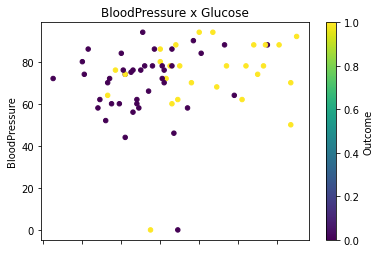

In [3]:
from sklearn.neighbors import KNeighborsClassifier

# Let's divide our dataset into training and test 
train = low_dim[0:700]
test = low_dim[700:]

test.plot.scatter(x='Glucose', y='BloodPressure', c="Outcome", colormap='viridis', title="BloodPressure x Glucose")

### Step 1 

Train a KNN classifier on the training set. Set `K`=2. Then test your classifier on the test set. How accurate is your classifier on the test set?

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# Type your code here

# Answer
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X=train[['Glucose', 'BloodPressure']].to_numpy(), y=train["Outcome"].to_numpy())
regular_pred = knn.predict(X=test[['Glucose', 'BloodPressure']].to_numpy())
np.mean(regular_pred == test["Outcome"].to_numpy())

0.6470588235294118

### Step 2

Now we are going to try implementing bagging. The basic procedure is 

1. Sample $N$ datapoints with replacement from the training set, where $N$ is the size of the training set.
2. Train a classifier on the $N$ datapoints
3. Make predictions for the test set
4. Average your predictions to make an aggregated prediction

In [5]:
def sample_with_replacement(training_set):
    #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html
    return training_set.sample(n=len(training_set), replace=True)

def predict(knn_clf, test_set):
    pass

In [6]:
all_predictions = []

for i in range(1000):
    train_sampled = sample_with_replacement(training_set=train)
    
    knn = KNeighborsClassifier(n_neighbors=2)

    knn.fit(X=train_sampled[['Glucose', 'BloodPressure']].to_numpy(), y=train_sampled["Outcome"].to_numpy())

    preds = None
    
    all_predictions.append(preds)

bootstrap_pred = np.mean(np.stack(all_predictions),axis=0) > .5
bootstrap_pred = bootstrap_pred.astype(int)

TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

In [ ]:
# Evaluate your predictions. How accurate are bootstrap_pred?

### Observation

What do you observe about the bootstrap error vs. the regular error

### Varying K

What do you think will happen if you increase or decrease `K`? Will bagging lead to larger or smaller gains? Test your hypothesis by varying the `K` variable. Report your results in a table or with a plot. 

### Soft prediction

In machine learning you may sometimes hear the terms `soft` and `hard` prediction. A `hard` prediction is either value of 0 or 1. A soft prediction is a value between 0 and 1. During each iteration of bagging above your classifier makes a prediction about if a point is a 0 or 1. If you average these scores you can make a soft prediction about each instance in the data set. 

1. Add a new column to your test data frame, recording soft predictions 

In [ ]:
# Type your code here

2. Make a plot using color to represent soft predictions

In [ ]:
# Type your code here

3. Looking at your plot, which points are more likely to be classified as 1 and which ones are more likely to be classified as zero. Do any of the predictions seem to make sense?

[Type your answer here]